# "Chill Havana" Project
### Análisis de Bares y Restaurantes en La Habana

Un día como cualquier otro salía un grupo de jóvenes de su escuela con ganas de pasar un ratico chill con los colegas, algo para picar y una musiquita de fondo fuera del aburrimiento. Ya todos habían dado el sí cuando alguien soltó la misma pregunta de siempre: Loco, ¿pero a dónde vamos? Nada, que esa era la pregunta que casi siemmpre cortaba todo el rollo. Buscar el sitio ideal para las vibes del momento era bastante complicado, en ningún sitio ponían toda la info necearia. "Tú busca en MenúCuba, ella en Instagram y yo la dirección en Maps, y ojalá salga todo!"

¿Nunca has sentido tremendo agobio de escoger a qué lugar salir? Pues ellos sí y decidieron que era la última vez. ¿Qué es lo más importante para ti a la hora de elegir? ¿La variedad del menú? ¿Un plato específico? ¿La ubicación? ¿La valoración de otras personas? 
Nada, que tú puedes elegir lo que quieras porque para eso aquella tarde nació el proyecto "Chill Havana".

Tanto lío y al final ese día no salieron, se quedaron pensando y organizando sus ideas. Sí, sí, ellos se tomaron el problema como algo personal, pero tranqui, tenían su arma secreta: el amiguito del grupo que le metía a todas esas tallas tecnológicas. Estaba clarísimo, querían hacer una página web que tuviera datos sobre más de 200 bares y restaurantes de La Habana para que cualquiera que quisiera elegir un lugar pudiera encontrar allí todo lo necesario para decidirse por el más adecuado para la ocasión.
Oye, que el proyecto era tremenda idea eh. ¿Cómo crees que cambiaría tu experiencia al salir a comer tener un sitio web tan duro?

Después de meses de caminar, investigar, aprender cositas y arrepentirse de tener ideas tan locas, el grupito decidió analizar sus datos recopilados.

In [72]:
#Crear el dataframe con los json para el trabajo con las bibliotecas de Python
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import folium
import plotly.express as px

def crear_data_frame():
    ruta = "C:/Users/andre/Desktop/Chill_Havana_Project/Jsons"
    data = []
    for archivo in glob.glob(ruta + "/*.json"):
        with open(archivo, 'r', encoding='utf-8') as f:
            contenido = json.load(f)
            data.append(contenido)
            
    df = pd.DataFrame(data)
    return df

df = crear_data_frame()
#print(df)

El grupo seleccionó tres municipios cabacera por ser los más frecuentados por ellos, de estos tres municipios analizaron 30 establecimientos, y del resto solo 10. Todos estos fueron clasificados en "bar", "restaurante" o "bar - restaurante"

In [3]:
# Contar los tipos de establecimientos
tipo_establecimientos = df['type_of_establishment'].value_counts().reset_index()
tipo_establecimientos.columns = ['Tipo de Establecimiento', 'Cantidad']

fig = px.pie(tipo_establecimientos, 
            values='Cantidad', 
            names='Tipo de Establecimiento', 
            title='Porcentaje de Tipos de Establecimientos en La Habana',
            hole=0.1)
fig.show()

### Mapa con las ubicaciones de los establecimientos analizados

In [3]:
mapa = folium.Map(location=[23.1136, -82.3666], zoom_start=12)  # Coordenadas de La Habana

for index, row in df.iterrows():
    latitude = row['coordinates']['latitude']
    longitude = row['coordinates']['longitude']
    name = row['name']
    
    folium.Marker(
        location=[latitude, longitude],
        popup=name,
        icon=folium.Icon(color='darkpurple')
    ).add_to(mapa)

mapa

Uno de los aspectos que consideraron de mayor importancia, principalmente para los más jóvenes, fue el análisis sobre cuántos establecimientos de los estudiados poseían redes sociales como Instagram y Facebook que, por lo general, influye en la popularidad del mismo.

In [4]:
#Ver la cantidad de establecimientos por municipio que tiene Instagram y Facebook.
def social_networks(contact):
    return bool(contact.get('instagram')) and bool(contact.get('facebook'))

df['has_social_net'] = df['contact'].apply(social_networks)

df_social_net = df[df['has_social_net']]

mun_count = df_social_net['district'].value_counts().reset_index()
mun_count.columns = ['Municipio', 'Cantidad']

fig = px.bar(mun_count, 
            x='Municipio', 
            y='Cantidad', 
            title='Cantidad de Restaurantes con Redes Sociales por Municipio',
            labels={'Cantidad': 'Cantidad de Restaurantes', 'Municipio': 'Municipio'},
            color='Cantidad',
            color_continuous_scale=px.colors.sequential.Purples)  # Cambiado a 'Greens'

fig.update_layout(xaxis_tickangle=-45)  # Rotar las etiquetas del eje x
fig.show()

Otro aspecto influyente es la valoración del público, por lo que se decidió analizar el rating de TripAdvisor para determinar cuáles eran los 20 mejores valorados y los 20 peores.

C:\Users\andre\AppData\Local\Temp\ipykernel_8944\761960508.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.



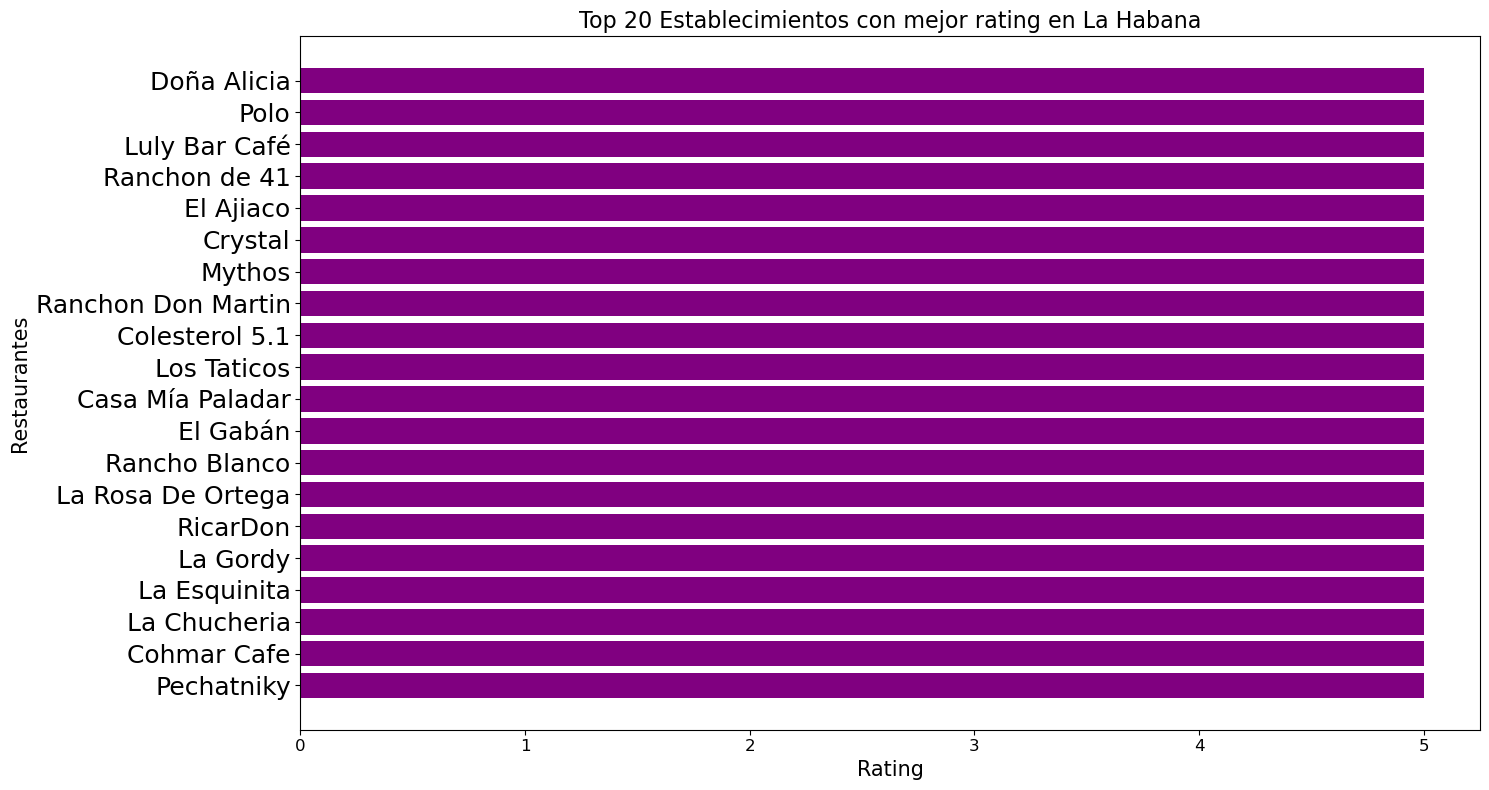

In [5]:
df[df["rating"].isna()]=0 #Hace cero los que tiene un rating "null"
df_valid_ratings = df.sort_values(by='rating', ascending=False).head(20) #Ordena de mayor a menor y solo deja los 20 mejores

plt.figure(figsize=(15, 8))
plt.barh(df_valid_ratings['name'], df_valid_ratings['rating'], color='purple')
plt.title('Top 20 Establecimientos con mejor rating en La Habana', fontsize=16)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Restaurantes', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

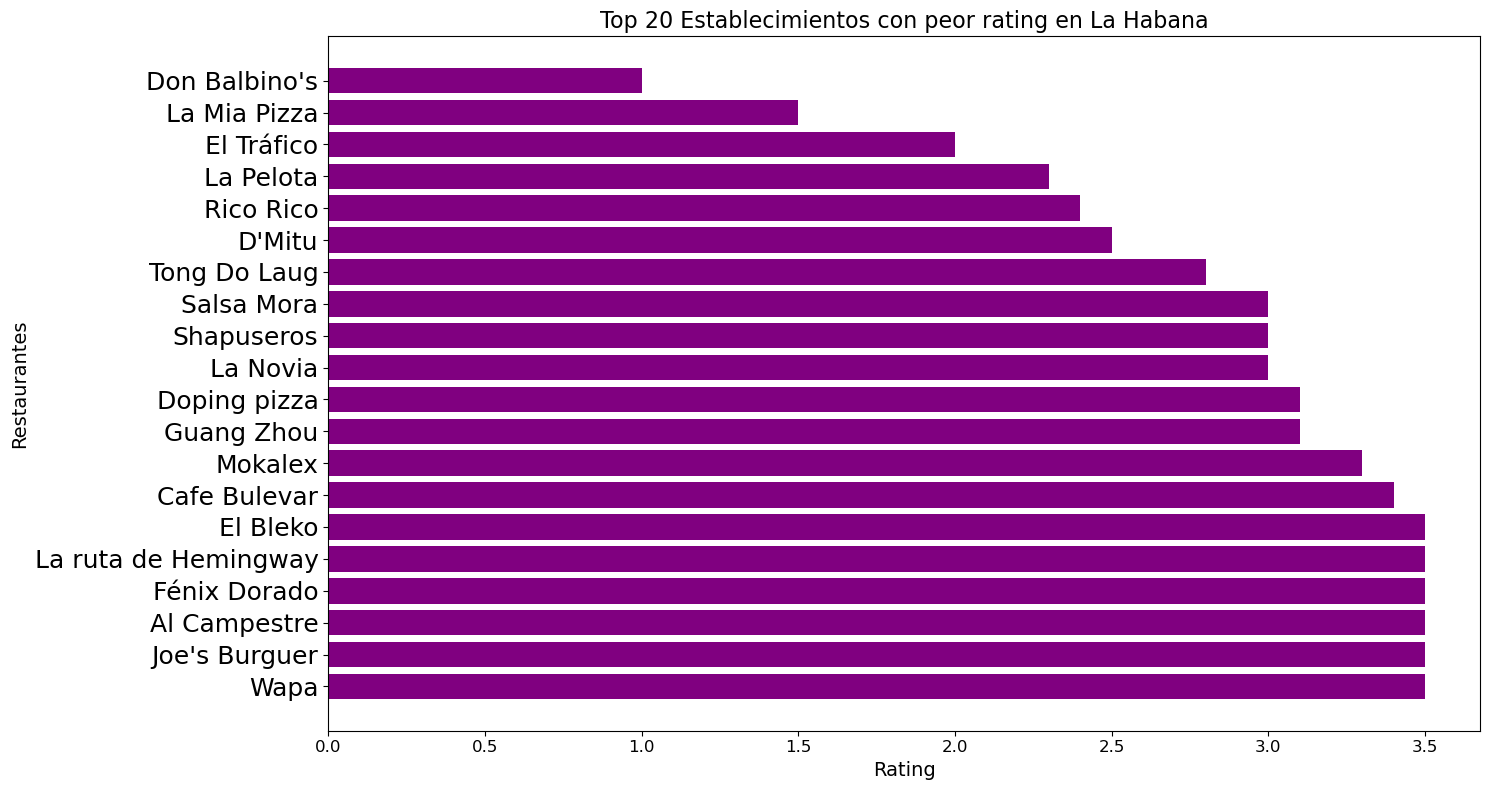

In [9]:
df_sorted_values = df.sort_values(by='rating', ascending=False).tail(51) #Ordena de mayor a menor y escoge las ultimas 51 lineas.
veinte_peores = df_sorted_values.iloc[:20,:] #Se queda con las 20 primeras, las otras 31 son 0.

plt.figure(figsize=(15, 8)) 
plt.barh(veinte_peores['name'], veinte_peores['rating'], color='purple')
plt.title('Top 20 Establecimientos con peor rating en La Habana', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Restaurantes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)
plt.tight_layout() 
plt.show()

Fue analizado el tipo de cocina para ver cuáles eran los más repetidos, luego de la tradicional comida cubana. 

In [75]:
cocina = df['cuisine'].explode()  # Separa cada elemento de las listas

conteo_cocina = cocina.value_counts().reset_index()
conteo_cocina.columns = ['Tipo de Cocina', 'Cantidad']

fig = px.bar(conteo_por_cocina, 
            x='Tipo de Cocina', 
            y='Cantidad', 
            title='Cantidad de Establecimientos por Tipo de Cocina',
            labels={'Cantidad': 'Cantidad de Establecimientos', 'Tipo de Cocina': 'Tipo de Cocina'},
            color='Cantidad',
            color_continuous_scale=px.colors.sequential.Purples)

fig.update_layout(xaxis_tickangle=-45) # Rotar las etiquetas de x

fig.show()